In [50]:
from nodes import Root, Div, Clones, Clone, Conn, Conns
from visualizer.individualvisualizer import IndividualVisualizer
from ea import EA
import pdb
import pickle
import gym
from history import History
#pdb.set_trace()
file = open("../out", 'rb')
hist = pickle.load(file)
file.close()

In [51]:
task = hist.tasks[-3]
env = gym.make(task)
env.seed(seed=hist.seeds[-1])
nn = hist.bests[-1].execute()
obs = env.reset()
done = False
totalReward = 0
while (not done):
    if (task == 'CartPole-v1'):
        action = nn.step(obs)[0]
        if (action > 0):
            action = 1
        else:
            action = 0
    else:
        action = nn.step(obs) * env.action_space.high
    obs, reward, done, info = env.step(action)
    env.render()
env.close()

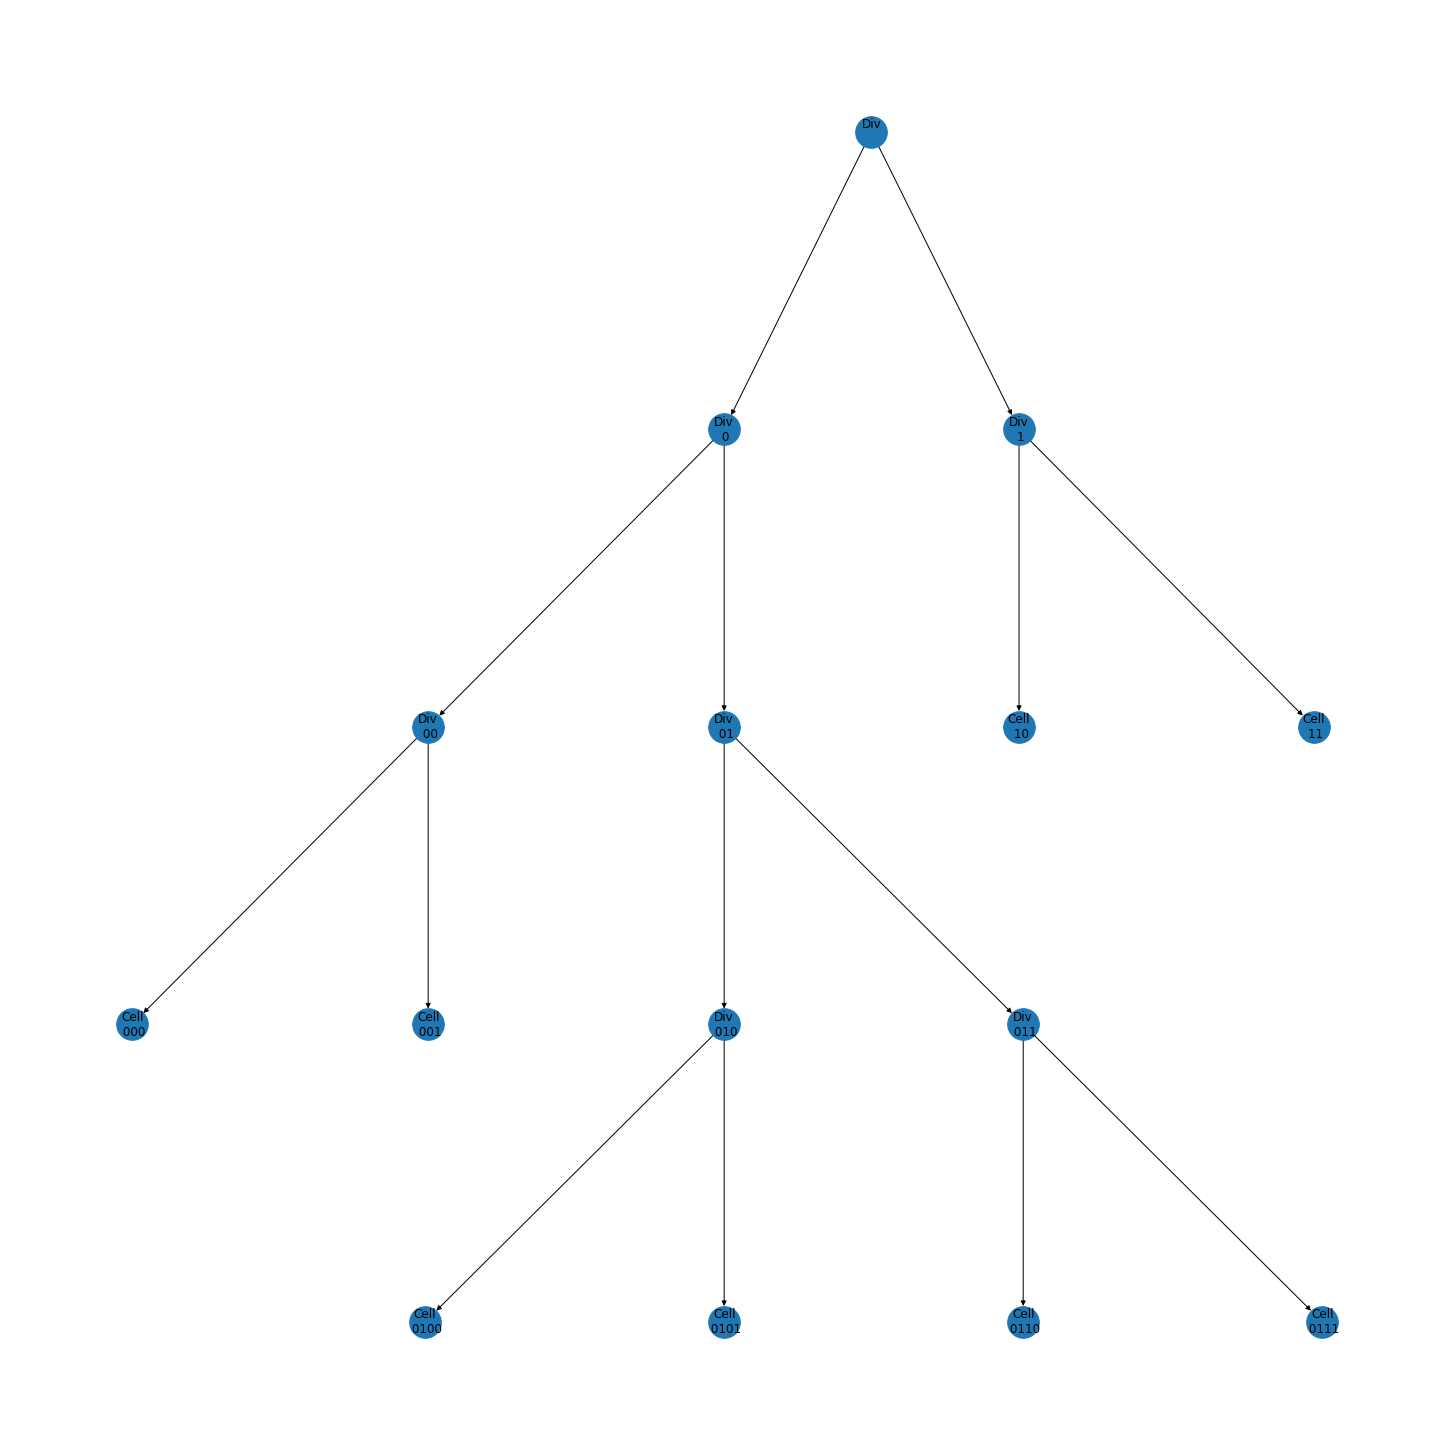

In [53]:
r1 = hist.bests[-2]
v1 = IndividualVisualizer(r1)
r1.compile()
v1.draw_tree()

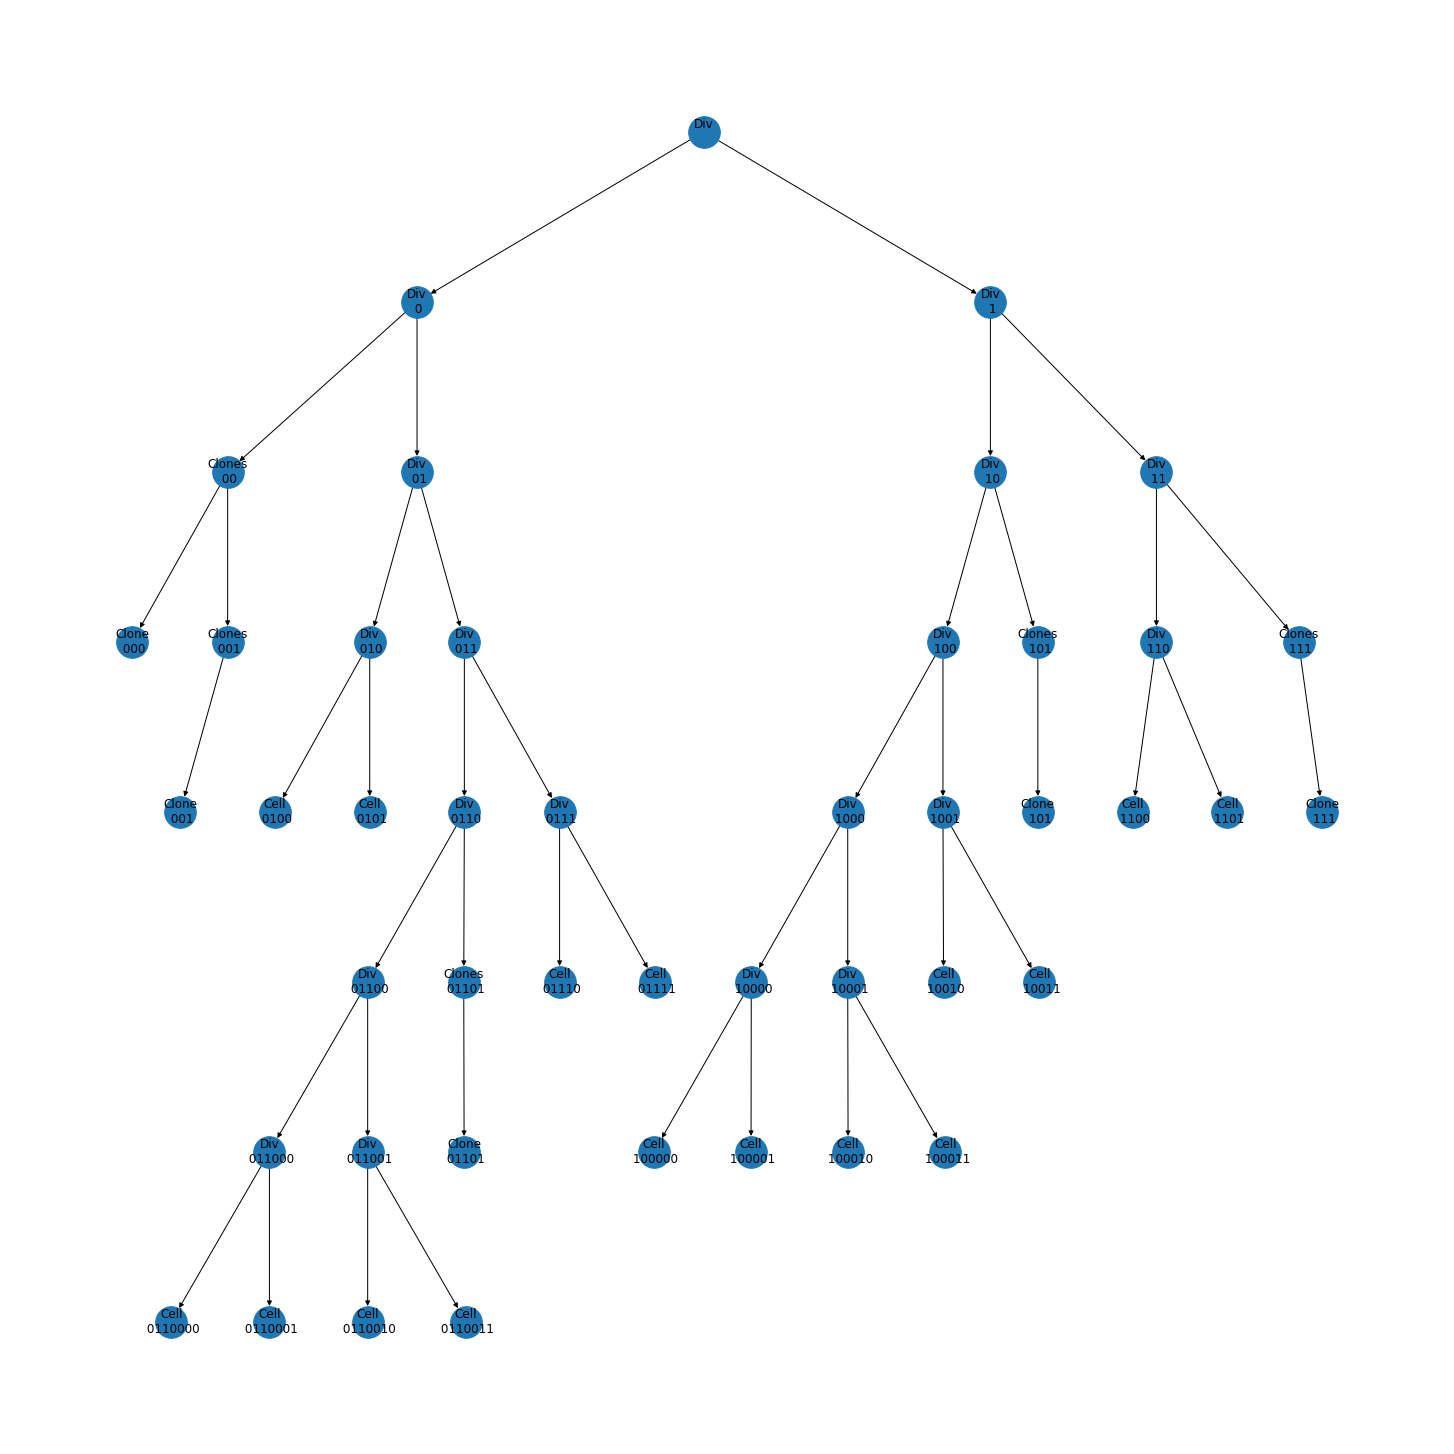

In [15]:
r2 = hist.bests[32]
v2 = IndividualVisualizer(r2)
r2.compile()
v2.draw_tree()

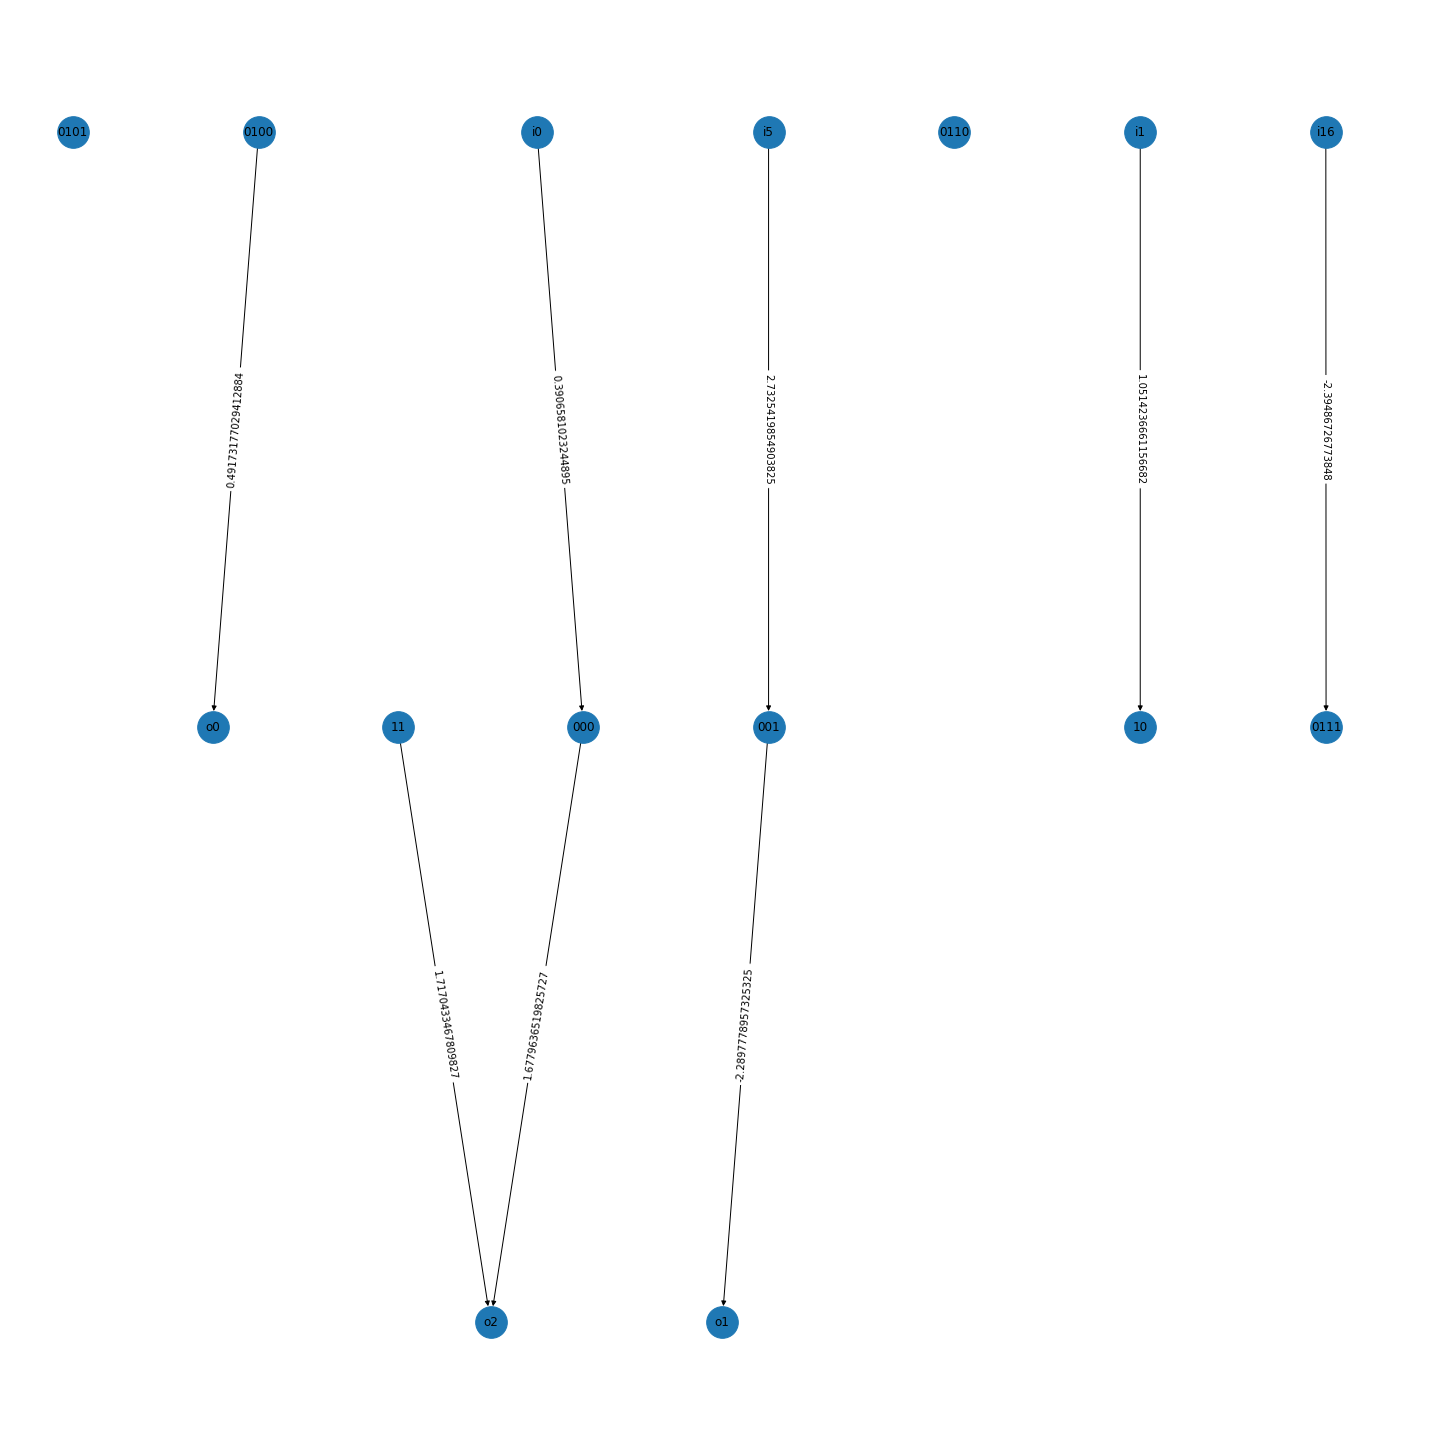

In [54]:
r1.execute()
v1.draw_nn()

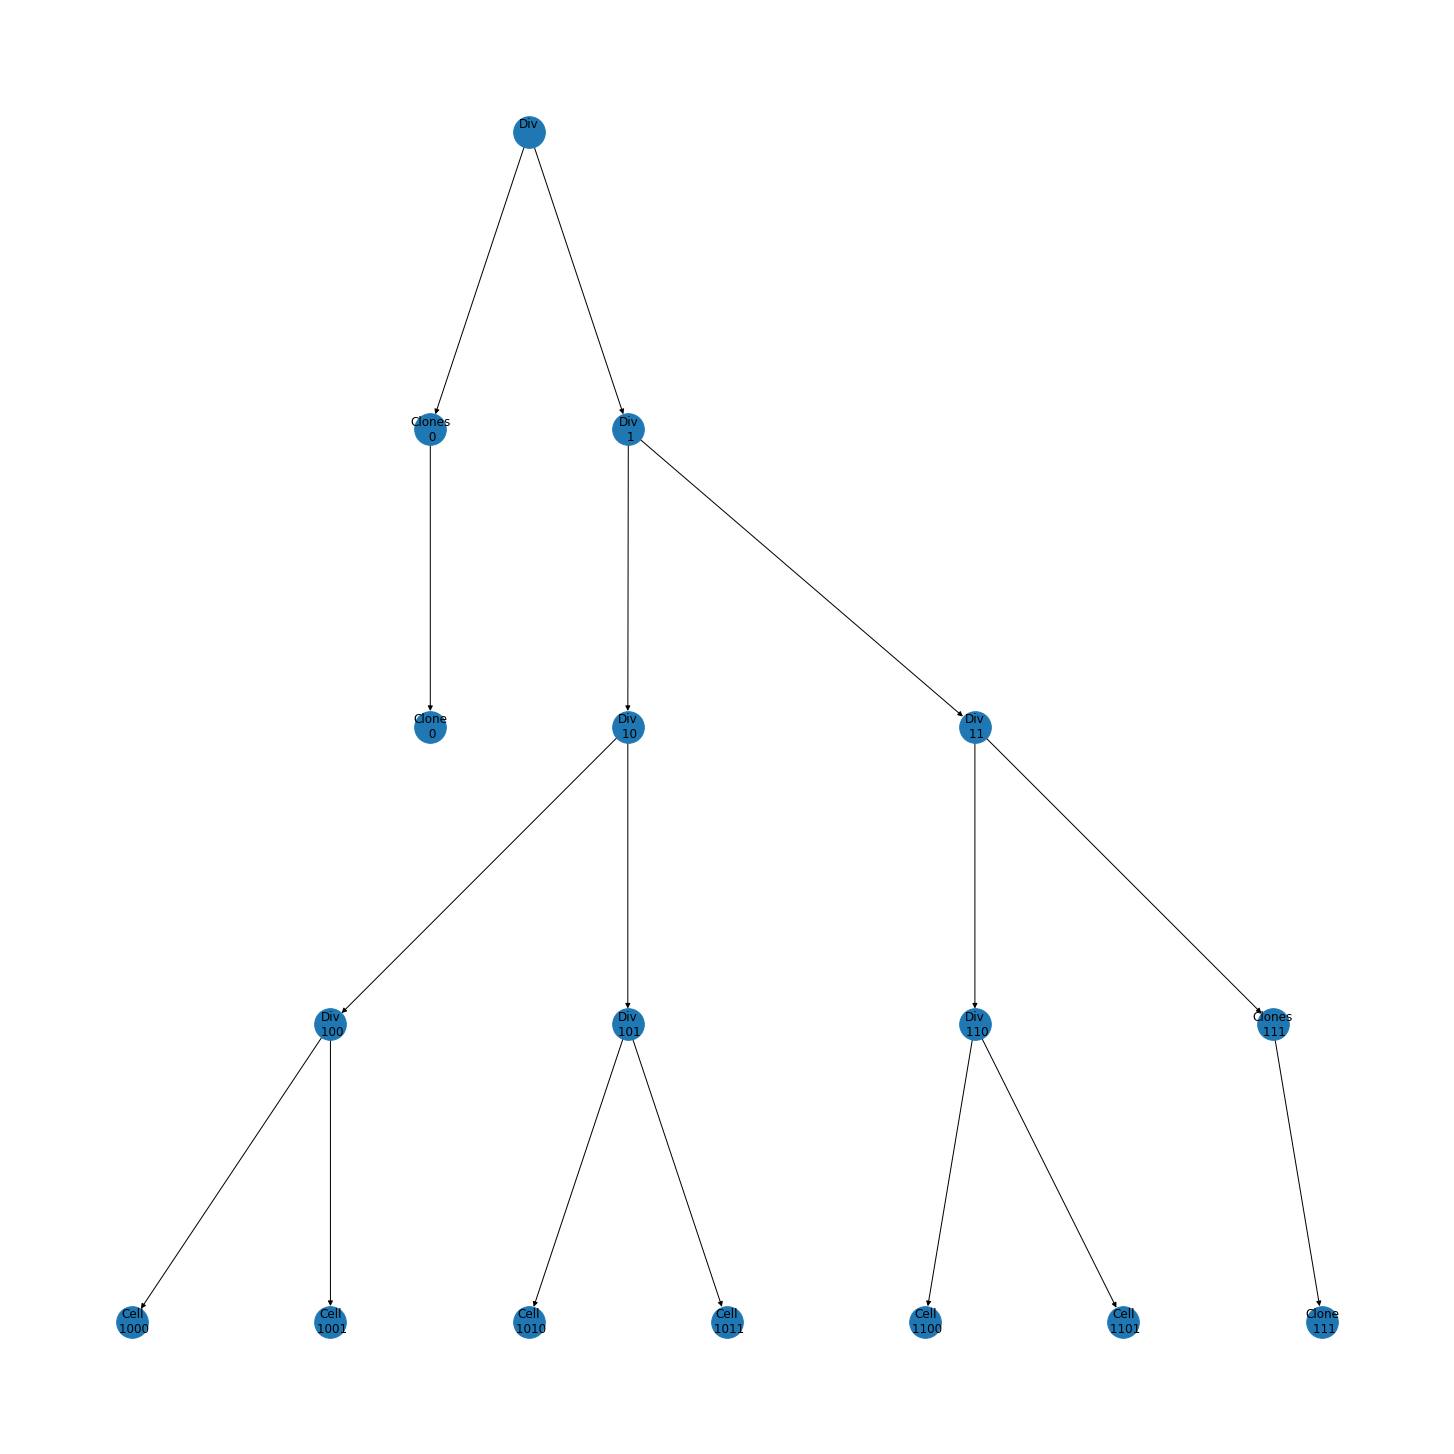

In [18]:
r2 = r1.deepcopy()
v2 = IndividualVisualizer(r2)
v2.draw_tree()

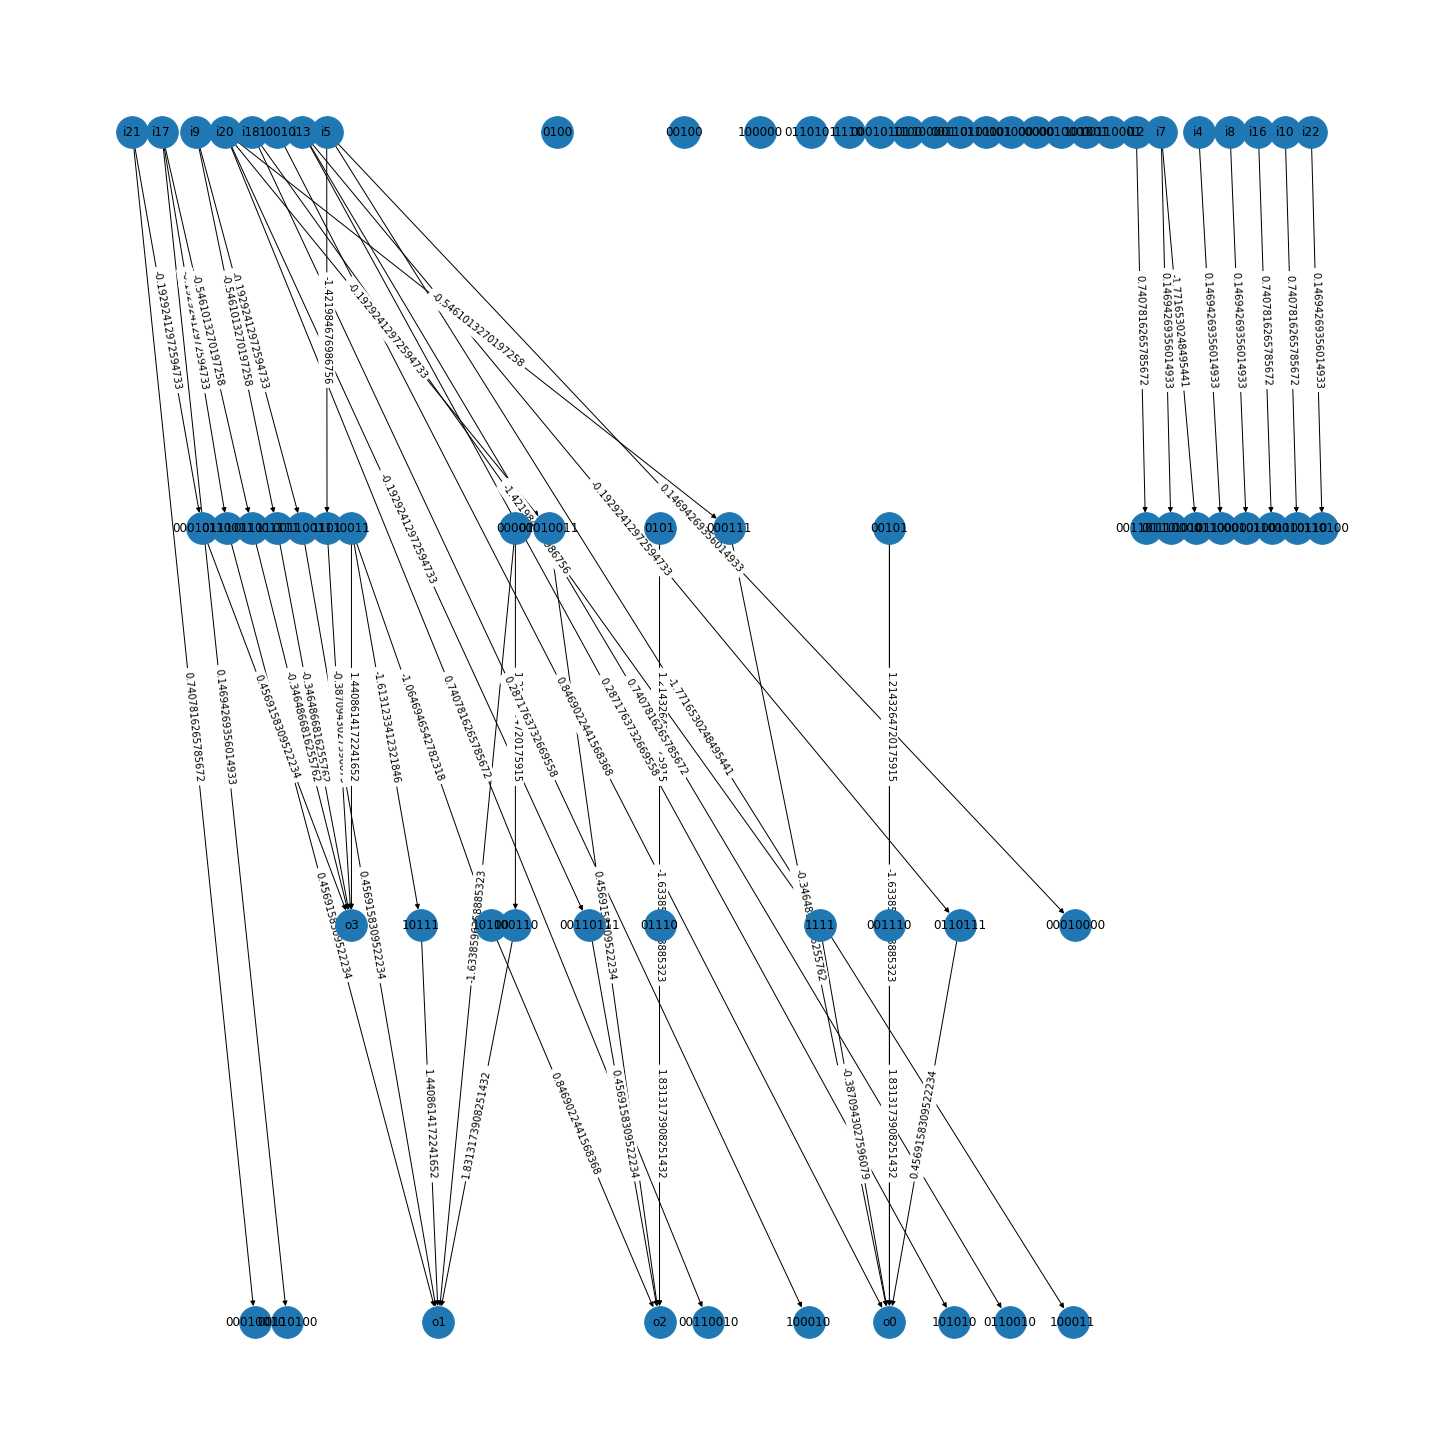

In [17]:
r2.execute()
v2.draw_nn()